In [1]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import norm, expon

## Visualization
import matplotlib.pyplot as plt

In [2]:
# Load functions .py files
from Theoretical_boundaries_visualization_functions import optimal_stopping_Brownian_bridge
from Perspective_comparison_functions import simulate_brownian_bridge
from Practical_case_functions import KDE

# Exact optimal stopping boundary for a Dirac Delta distribution

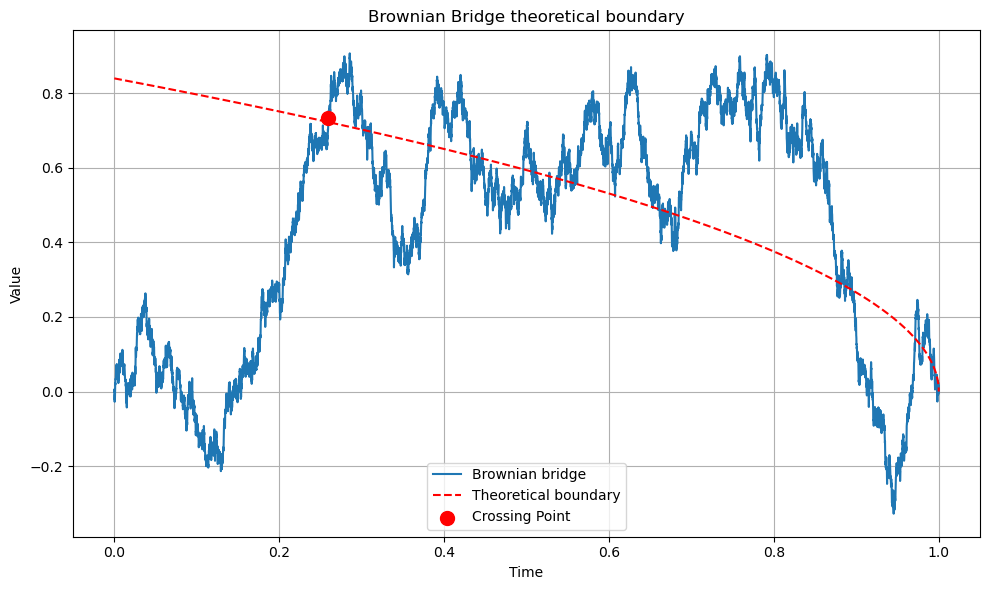

0.2597259725972597


In [3]:
# Initialize variables
r = 0 #Pinning point
mesh = 10000 # Points in temporal grid
t_mesh = np.linspace(0, 1, mesh)

# Boundary
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Brownian bridge
np.random.seed(6)
times, BB = simulate_brownian_bridge(t = 0, z_t = 0, T = 1, z_T = r, u=None, n_steps=mesh)

# Find first crossing index
cross_idx = np.argmax(BB > exact_boundary) if np.any(BB > exact_boundary) else None

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_mesh, BB, label='Brownian bridge')
plt.plot(t_mesh, exact_boundary, 'r--', label='Theoretical boundary')

if cross_idx is not None:
    plt.scatter(t_mesh[cross_idx], BB[cross_idx], color='red', s=100, zorder=5, label='Crossing Point')

plt.title('Brownian Bridge theoretical boundary')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("OSP_BB_visualization.png", dpi=300)
plt.show()

print(t_mesh[cross_idx])

# Density estimation

## EMV

## KDE

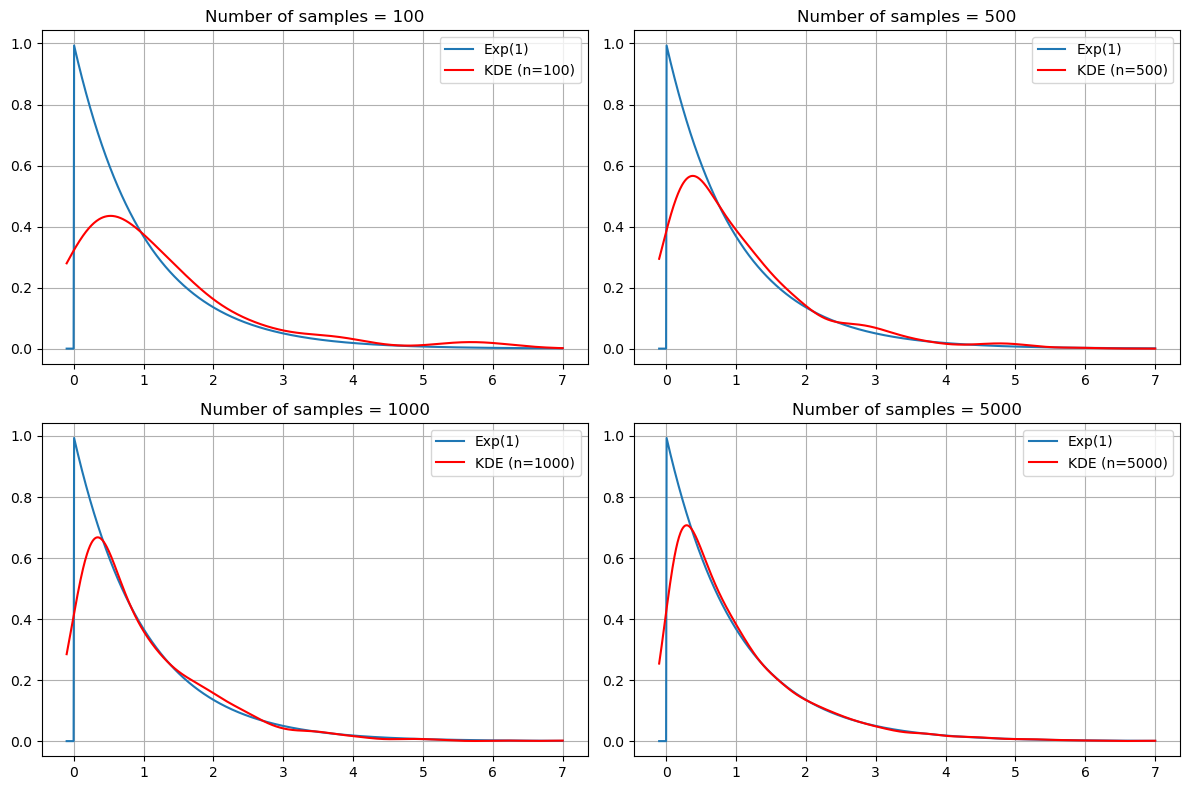

In [14]:
# Set up figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
n_values = [100, 500, 1000, 5000]
x = np.linspace(-0.1, 7, 1000)

for ax, n in zip(axes.flat, n_values):
    # Generate data
    exp_points = np.random.exponential(scale=1, size=n)
    
    # KDE
    weights, parameters = KDE(Z_1=exp_points)
    means = parameters[0]
    stds = parameters[1]
    
    # Compute KDE
    pdf = np.zeros_like(x)
    for w, m, s in zip(weights, means, stds):
        pdf += w * norm.pdf(x, loc=m, scale=s)
    
    # Plot
    ax.plot(x, expon.pdf(x, scale=1), label='Exp(1)')
    ax.plot(x, pdf, label=f'KDE (n={n})', color='red')
    ax.set_title(f"Number of samples = {n}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig("KDE.png", dpi=300)
plt.show()
